In [66]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.linear_model import LinearRegression

In [96]:
# Compare Order of Polynimials
def ERMS_Deg(x, y):
    E_RMS = np.zeros(10)
    for M in range (1,11):
        phi = np.vander(x,M,increasing=True)
        w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(phi), phi)),np.transpose(phi)),y)
        y_predict = np.dot(phi,w)
        E_w = 0.5*sum([(y_predict[n]-y[n])**2 for n in range(N)])
        E_rms = np.sqrt(2*E_w/N)
        #print(E_rms)
        
        E_RMS[M-1] = E_rms
        
        #print('\nThe coefficients of the %i order degree polynomial are:' %(M-1))
        #print(w)
    return E_RMS

Text(0, 0.5, 'E_RMS')

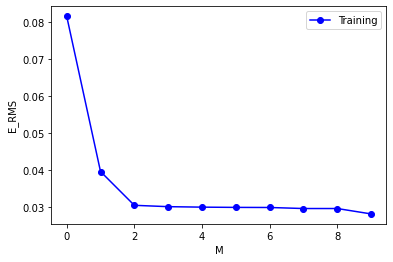

In [97]:
E_RMS = ERMS_Deg(time,t3b3)
M = [0,1,2,3,4,5,6,7,8,9]
plt.plot(range(10), E_RMS, 'ob-', label = 'Training')
plt.legend()
plt.xlabel('M')
plt.ylabel('E_RMS')

In [92]:
# SK-Learn Library
reg = LinearRegression().fit(time.reshape(-1,1), t3b3.reshape(-1,1))
w1 = reg.coef_
w0 = reg.intercept_
output = w0 + w1*time
output = output.reshape(-1)

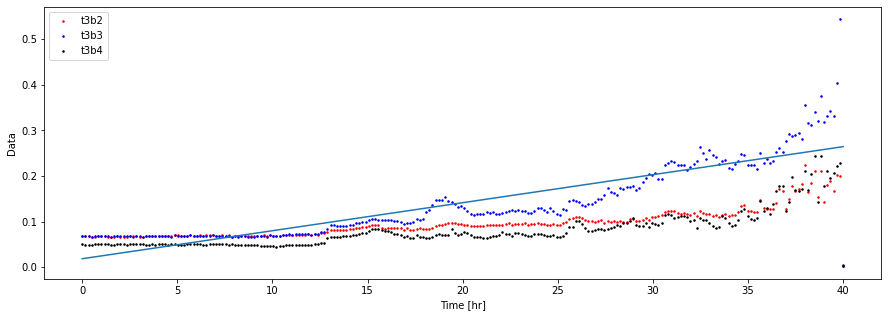

In [84]:
plt.plot(time, t3b2, 'or', markersize=1.5, label = 't3b2')
plt.plot(time, t3b3, 'ob', markersize=1.5, label = 't3b3')
plt.plot(time, t3b4, 'ok', markersize=1.5, label = 't3b4')
plt.plot(time, output) # sk-learn plot

plt.legend()
plt.xlabel('Time [hr]')
plt.ylabel('Data')

fig = plt.gcf()
fig.set_size_inches(15, 5)

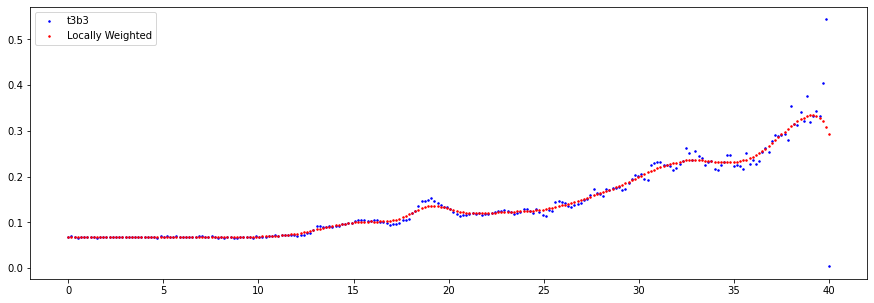

In [106]:
# Locally Weighted
def W_LR(x, y):
    N = 240
    x_plt = time
    R = np.zeros((N, N))
    phi = np.vander(x, 2, increasing=True)
    tau = 0.8
    y_out = np.zeros((N, 1))
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            R[j - 1, j - 1] = np.exp(-(x_plt[i - 1] - x[j - 1]) ** 2 / (2 * (tau) ** 2))
        w = np.dot(np.dot(np.dot(np.linalg.inv(np.dot(np.dot(phi.T, R), phi)), phi.T), R), y)
        y_out[i - 1] = w[0] + w[1] * x_plt[i - 1]
    return y_out

y_out = W_LR(time, t3b3)

plt.plot(time, t3b3, 'ob',markersize=1.5, label = 't3b3')
plt.plot(time, y_out, 'or', markersize=1.5, label = 'Locally Weighted')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15, 5)